In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import ncar_jobqueue
from dask.distributed import Client

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
style.use('default')

Cannot write to data cache folder '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


## Get noGCB run

In [2]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.003'
#path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'
path = '/glade/campaign/cgd/oce/projects/besome/cesm-cases/' + case + '/ocn/proc/tseries/month_1'


In [3]:
variables = ['FG_CO2','FG_ALT_CO2']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### get first IAF

In [4]:
%%time
ds_list = []
print(f'reading {case}')
ds1 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.000101-006212.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds1 = xr.merge((ds1, dsv))
    ds_list.append(ds1)

reading cesm22cocco.G1850ECOIAF.T62_g17.003
FG_CO2
FG_ALT_CO2
CPU times: user 601 ms, sys: 59 ms, total: 660 ms
Wall time: 1.09 s


In [5]:
ds1 = ds1.drop([v for v in ds1.variables if v not in keep_vars])

In [6]:
#fix time dimension so it's a mean of the timebounds
ds1["time"] = ds1.time_bound.compute().mean(dim="d2")

In [7]:
%%time
ds1 = ds1.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 6.49 s, sys: 1.35 s, total: 7.85 s
Wall time: 6.61 s


#### get 2nd IAF

In [8]:
%%time
ds_list = []
print(f'reading {case}')
ds2 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.006301-012412.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds2 = xr.merge((ds2, dsv))
    ds_list.append(ds2)

reading cesm22cocco.G1850ECOIAF.T62_g17.003
FG_CO2
FG_ALT_CO2
CPU times: user 583 ms, sys: 50.2 ms, total: 633 ms
Wall time: 1.02 s


In [9]:
ds2 = ds2.drop([v for v in ds2.variables if v not in keep_vars])

In [10]:
#fix time dimension so it's a mean of the timebounds
ds2["time"] = ds2.time_bound.compute().mean(dim="d2")

In [11]:
%%time
ds2 = ds2.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 6.76 s, sys: 1.43 s, total: 8.19 s
Wall time: 7.19 s


#### get 3rd IAF

In [12]:
%%time
ds_list = []
print(f'reading {case}')
ds3 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.012501-018612.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds3 = xr.merge((ds3, dsv))
    ds_list.append(ds3)

reading cesm22cocco.G1850ECOIAF.T62_g17.003
FG_CO2
FG_ALT_CO2
CPU times: user 629 ms, sys: 39.2 ms, total: 669 ms
Wall time: 837 ms


In [13]:
ds3 = ds3.drop([v for v in ds3.variables if v not in keep_vars])

In [14]:
#fix time dimension so it's a mean of the timebounds
ds3["time"] = ds3.time_bound.compute().mean(dim="d2")

In [15]:
%%time
ds3 = ds3.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 6.98 s, sys: 1.32 s, total: 8.3 s
Wall time: 7.06 s


#### get 4th IAF

In [16]:
%%time
ds_list = []
print(f'reading {case}')
ds4 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.018701-024812.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds4 = xr.merge((ds4, dsv))
    ds_list.append(ds4)

reading cesm22cocco.G1850ECOIAF.T62_g17.003
FG_CO2
FG_ALT_CO2
CPU times: user 631 ms, sys: 42.9 ms, total: 674 ms
Wall time: 955 ms


In [17]:
ds4 = ds4.drop([v for v in ds4.variables if v not in keep_vars])

In [18]:
#fix time dimension so it's a mean of the timebounds
ds4["time"] = ds4.time_bound.compute().mean(dim="d2")

In [19]:
%%time
ds4 = ds4.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 6.59 s, sys: 1.23 s, total: 7.82 s
Wall time: 6.61 s


#### get 5th IAF

In [20]:
%%time
ds_list = []
print(f'reading {case}')
ds5 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.024901-031012.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds5 = xr.merge((ds5, dsv))
    ds_list.append(ds5)

reading cesm22cocco.G1850ECOIAF.T62_g17.003
FG_CO2
FG_ALT_CO2
CPU times: user 597 ms, sys: 37.7 ms, total: 635 ms
Wall time: 1.95 s


In [21]:
ds5 = ds5.drop([v for v in ds5.variables if v not in keep_vars])

In [22]:
#fix time dimension so it's a mean of the timebounds
ds5["time"] = ds5.time_bound.compute().mean(dim="d2")

In [23]:
%%time
ds5 = ds5.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 6.57 s, sys: 1.35 s, total: 7.92 s
Wall time: 6.69 s


#### Get 410 ppm part

In [24]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.005'
path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'

In [25]:
%%time
ds_list = []

print(f'reading {case}')
ds6 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.031101-033012.nc'))
    
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds6 = xr.merge((ds6, dsv))
    ds_list.append(ds6)

reading cesm22cocco.G1850ECOIAF.T62_g17.005
FG_CO2
FG_ALT_CO2
CPU times: user 585 ms, sys: 24.3 ms, total: 610 ms
Wall time: 850 ms


In [26]:
ds6 = ds6.drop([v for v in ds6.variables if v not in keep_vars])

In [27]:
#fix time dimension so it's a mean of the timebounds
ds6["time"] = ds6.time_bound.compute().mean(dim="d2")

In [28]:
%%time
ds6 = ds6.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 2.17 s, sys: 412 ms, total: 2.58 s
Wall time: 2.18 s


#### concatenate datasets

In [29]:
ds = xr.concat([ds1, ds2, ds3, ds4, ds5], 'time')

## Get 2x GCB run

In [30]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.004'
#path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'
path = '/glade/campaign/cgd/oce/projects/besome/cesm-cases/' + case + '/ocn/proc/tseries/month_1'

In [31]:
variables = ['FG_ALT_CO2']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### Get 1st IAF

In [32]:
%%time
ds_list = []
print(f'reading {case}')
ds1 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.000101-006212.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds1 = xr.merge((ds1, dsv))
    ds_list.append(ds1)

reading cesm22cocco.G1850ECOIAF.T62_g17.004
FG_ALT_CO2
CPU times: user 64.1 ms, sys: 24.6 ms, total: 88.7 ms
Wall time: 245 ms


In [33]:
ds1 = ds1.drop([v for v in ds1.variables if v not in keep_vars])

In [34]:
#fix time dimension so it's a mean of the timebounds
ds1["time"] = ds1.time_bound.compute().mean(dim="d2")

In [35]:
%%time
ds1 = ds1.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.32 s, sys: 530 ms, total: 3.85 s
Wall time: 3.73 s


#### Get 2nd IAF

In [36]:
%%time
ds_list = []
print(f'reading {case}')
ds2 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.006301-012412.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds2 = xr.merge((ds2, dsv))
    ds_list.append(ds2)

reading cesm22cocco.G1850ECOIAF.T62_g17.004
FG_ALT_CO2
CPU times: user 66.3 ms, sys: 25.9 ms, total: 92.2 ms
Wall time: 563 ms


In [37]:
ds2 = ds2.drop([v for v in ds2.variables if v not in keep_vars])

In [38]:
#fix time dimension so it's a mean of the timebounds
ds2["time"] = ds2.time_bound.compute().mean(dim="d2")

In [39]:
%%time
ds2 = ds2.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.32 s, sys: 588 ms, total: 3.91 s
Wall time: 3.76 s


#### get 3rd IAF

In [40]:
%%time
ds_list = []
print(f'reading {case}')
ds3 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.012501-018612.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds3 = xr.merge((ds3, dsv))
    ds_list.append(ds3)

reading cesm22cocco.G1850ECOIAF.T62_g17.004
FG_ALT_CO2
CPU times: user 63.4 ms, sys: 36.5 ms, total: 99.9 ms
Wall time: 199 ms


In [41]:
ds3 = ds3.drop([v for v in ds3.variables if v not in keep_vars])

In [42]:
#fix time dimension so it's a mean of the timebounds
ds3["time"] = ds3.time_bound.compute().mean(dim="d2")

In [43]:
%%time
ds3 = ds3.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.47 s, sys: 599 ms, total: 4.07 s
Wall time: 3.9 s


#### 4th IAF

In [44]:
%%time
ds_list = []
print(f'reading {case}')
ds4 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.018701-024812.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds4 = xr.merge((ds4, dsv))
    ds_list.append(ds4)

reading cesm22cocco.G1850ECOIAF.T62_g17.004
FG_ALT_CO2
CPU times: user 61.8 ms, sys: 26.7 ms, total: 88.5 ms
Wall time: 183 ms


In [45]:
ds4 = ds4.drop([v for v in ds4.variables if v not in keep_vars])

In [46]:
#fix time dimension so it's a mean of the timebounds
ds4["time"] = ds4.time_bound.compute().mean(dim="d2")

In [47]:
%%time
ds4 = ds4.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.31 s, sys: 576 ms, total: 3.88 s
Wall time: 3.79 s


#### 5th IAF

In [48]:
%%time
ds_list = []
print(f'reading {case}')
ds5 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.024901-031012.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds5 = xr.merge((ds5, dsv))
    ds_list.append(ds5)

reading cesm22cocco.G1850ECOIAF.T62_g17.004
FG_ALT_CO2
CPU times: user 67.7 ms, sys: 25.9 ms, total: 93.7 ms
Wall time: 165 ms


In [49]:
ds5 = ds5.drop([v for v in ds5.variables if v not in keep_vars])

In [50]:
#fix time dimension so it's a mean of the timebounds
ds5["time"] = ds5.time_bound.compute().mean(dim="d2")

In [51]:
%%time
ds5 = ds5.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.29 s, sys: 577 ms, total: 3.87 s
Wall time: 3.75 s


#### high CO2 part

In [52]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.006'
path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'

In [53]:
%%time
ds_list = []

print(f'reading {case}')
ds6 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.031101-033012.nc'))
    
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds6 = xr.merge((ds6, dsv))
    ds_list.append(ds6)

reading cesm22cocco.G1850ECOIAF.T62_g17.006
FG_ALT_CO2
CPU times: user 61.4 ms, sys: 3.44 ms, total: 64.8 ms
Wall time: 263 ms


In [54]:
ds6 = ds6.drop([v for v in ds6.variables if v not in keep_vars])

In [55]:
#fix time dimension so it's a mean of the timebounds
ds6["time"] = ds6.time_bound.compute().mean(dim="d2")

In [56]:
%%time
ds6 = ds6.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 1.15 s, sys: 142 ms, total: 1.29 s
Wall time: 1.28 s


#### concatenate

In [57]:
ds2x = xr.concat([ds1, ds2, ds3, ds4, ds5], 'time')

### Get the 100m DLS run

In [58]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.009'
#path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'
path = '/glade/campaign/cgd/oce/projects/besome/cesm-cases/' + case + '/ocn/proc/tseries/month_1'

In [59]:
variables = ['FG_ALT_CO2']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### get 1st IAF

In [60]:
%%time
ds_list = []
print(f'reading {case}')
ds1 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.000101-006212.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds1 = xr.merge((ds1, dsv))
    ds_list.append(ds1)

reading cesm22cocco.G1850ECOIAF.T62_g17.009
FG_ALT_CO2
CPU times: user 61.2 ms, sys: 20.5 ms, total: 81.7 ms
Wall time: 189 ms


In [61]:
ds1 = ds1.drop([v for v in ds1.variables if v not in keep_vars])

In [62]:
#fix time dimension so it's a mean of the timebounds
ds1["time"] = ds1.time_bound.compute().mean(dim="d2")

In [63]:
%%time
ds1 = ds1.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.4 s, sys: 546 ms, total: 3.94 s
Wall time: 3.83 s


#### get 2nd IAF

In [64]:
%%time
ds_list = []
print(f'reading {case}')
ds2 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.006301-012412.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds2 = xr.merge((ds2, dsv))
    ds_list.append(ds2)

reading cesm22cocco.G1850ECOIAF.T62_g17.009
FG_ALT_CO2
CPU times: user 63.1 ms, sys: 17.9 ms, total: 81 ms
Wall time: 267 ms


In [65]:
ds2 = ds2.drop([v for v in ds2.variables if v not in keep_vars])

In [66]:
#fix time dimension so it's a mean of the timebounds
ds2["time"] = ds2.time_bound.compute().mean(dim="d2")

In [67]:
%%time
ds2 = ds2.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.25 s, sys: 560 ms, total: 3.81 s
Wall time: 3.66 s


#### get 3rd IAF

In [68]:
%%time
ds_list = []
print(f'reading {case}')
ds3 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.012501-018612.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds3 = xr.merge((ds3, dsv))
    ds_list.append(ds3)

reading cesm22cocco.G1850ECOIAF.T62_g17.009
FG_ALT_CO2
CPU times: user 65.1 ms, sys: 23.2 ms, total: 88.3 ms
Wall time: 228 ms


In [69]:
ds3 = ds3.drop([v for v in ds3.variables if v not in keep_vars])

In [70]:
#fix time dimension so it's a mean of the timebounds
ds3["time"] = ds3.time_bound.compute().mean(dim="d2")

In [71]:
%%time
ds3 = ds3.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.72 s, sys: 595 ms, total: 4.32 s
Wall time: 4.17 s


#### get 4th IAF

In [72]:
%%time
ds_list = []
print(f'reading {case}')
ds4 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.018701-024812.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds4 = xr.merge((ds4, dsv))
    ds_list.append(ds4)

reading cesm22cocco.G1850ECOIAF.T62_g17.009
FG_ALT_CO2
CPU times: user 64.8 ms, sys: 25.8 ms, total: 90.6 ms
Wall time: 174 ms


In [73]:
ds4 = ds4.drop([v for v in ds4.variables if v not in keep_vars])

In [74]:
#fix time dimension so it's a mean of the timebounds
ds4["time"] = ds4.time_bound.compute().mean(dim="d2")

In [75]:
%%time
ds4 = ds4.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.32 s, sys: 551 ms, total: 3.87 s
Wall time: 3.7 s


#### get 5th IAF

In [76]:
%%time
ds_list = []
print(f'reading {case}')
ds5 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.024901-031012.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds5 = xr.merge((ds5, dsv))
    ds_list.append(ds5)

reading cesm22cocco.G1850ECOIAF.T62_g17.009
FG_ALT_CO2
CPU times: user 62.6 ms, sys: 18.3 ms, total: 80.9 ms
Wall time: 176 ms


In [77]:
ds5 = ds5.drop([v for v in ds5.variables if v not in keep_vars])

In [78]:
#fix time dimension so it's a mean of the timebounds
ds5["time"] = ds5.time_bound.compute().mean(dim="d2")

In [79]:
%%time
ds5 = ds5.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.36 s, sys: 532 ms, total: 3.9 s
Wall time: 3.74 s


#### concatenate datasets

In [80]:
ds100mDSL = xr.concat([ds1, ds2, ds3, ds4, ds5], 'time')

### Get the 1000m DLS run/

In [81]:
case = 'cesm22cocco.G1850ECOIAF.T62_g17.010'
#path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'
path = '/glade/campaign/cgd/oce/projects/besome/cesm-cases/' + case + '/ocn/proc/tseries/month_1'

In [82]:
variables = ['FG_ALT_CO2']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### get 1st IAF

In [83]:
%%time
ds_list = []
print(f'reading {case}')
ds1 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.000101-006212.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds1 = xr.merge((ds1, dsv))
    ds_list.append(ds1)

reading cesm22cocco.G1850ECOIAF.T62_g17.010
FG_ALT_CO2
CPU times: user 66.2 ms, sys: 18.8 ms, total: 85 ms
Wall time: 252 ms


In [84]:
ds1 = ds1.drop([v for v in ds1.variables if v not in keep_vars])

In [85]:
#fix time dimension so it's a mean of the timebounds
ds1["time"] = ds1.time_bound.compute().mean(dim="d2")

In [86]:
%%time
ds1 = ds1.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.29 s, sys: 577 ms, total: 3.87 s
Wall time: 3.73 s


#### get 2nd IAF

In [87]:
%%time
ds_list = []
print(f'reading {case}')
ds2 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.006301-012412.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds2 = xr.merge((ds2, dsv))
    ds_list.append(ds2)

reading cesm22cocco.G1850ECOIAF.T62_g17.010
FG_ALT_CO2
CPU times: user 66.4 ms, sys: 27.9 ms, total: 94.3 ms
Wall time: 224 ms


In [88]:
ds2 = ds2.drop([v for v in ds2.variables if v not in keep_vars])

In [89]:
#fix time dimension so it's a mean of the timebounds
ds2["time"] = ds2.time_bound.compute().mean(dim="d2")

In [90]:
%%time
ds2 = ds2.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.33 s, sys: 552 ms, total: 3.88 s
Wall time: 3.7 s


#### get 3rd IAF

In [91]:
%%time
ds_list = []
print(f'reading {case}')
ds3 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.012501-018612.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds3 = xr.merge((ds3, dsv))
    ds_list.append(ds3)

reading cesm22cocco.G1850ECOIAF.T62_g17.010
FG_ALT_CO2
CPU times: user 61.3 ms, sys: 17.7 ms, total: 79 ms
Wall time: 203 ms


In [92]:
ds3 = ds3.drop([v for v in ds3.variables if v not in keep_vars])

In [93]:
#fix time dimension so it's a mean of the timebounds
ds3["time"] = ds3.time_bound.compute().mean(dim="d2")

In [94]:
%%time
ds3 = ds3.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.36 s, sys: 548 ms, total: 3.91 s
Wall time: 3.77 s


#### get 4th IAF

In [95]:
%%time
ds_list = []
print(f'reading {case}')
ds4 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.018701-024812.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds4 = xr.merge((ds4, dsv))
    ds_list.append(ds4)

reading cesm22cocco.G1850ECOIAF.T62_g17.010
FG_ALT_CO2
CPU times: user 59.5 ms, sys: 22 ms, total: 81.5 ms
Wall time: 228 ms


In [96]:
ds4 = ds4.drop([v for v in ds4.variables if v not in keep_vars])

In [97]:
#fix time dimension so it's a mean of the timebounds
ds4["time"] = ds4.time_bound.compute().mean(dim="d2")

In [98]:
%%time
ds4 = ds4.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.3 s, sys: 538 ms, total: 3.84 s
Wall time: 3.68 s


#### get 5th IAF

In [99]:
%%time
ds_list = []
print(f'reading {case}')
ds5 = xr.Dataset()
for v in variables:
    
    print(v)   
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.024901-031012.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)

    ds5 = xr.merge((ds5, dsv))
    ds_list.append(ds5)

reading cesm22cocco.G1850ECOIAF.T62_g17.010
FG_ALT_CO2
CPU times: user 67 ms, sys: 16.2 ms, total: 83.2 ms
Wall time: 232 ms


In [100]:
ds5 = ds5.drop([v for v in ds5.variables if v not in keep_vars])

In [101]:
#fix time dimension so it's a mean of the timebounds
ds5["time"] = ds5.time_bound.compute().mean(dim="d2")

In [102]:
%%time
ds5 = ds5.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 3.35 s, sys: 589 ms, total: 3.94 s
Wall time: 3.8 s


#### concatenate datasets

In [103]:
ds1000mDSL = xr.concat([ds1, ds2, ds3, ds4, ds5], 'time')

#### get the WOA

In [104]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2013_POPgrid.nc'
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)

In [105]:
ds_woa['z_t'] = ds1.z_t
tlen=len(ds.time)
tlen

310

In [106]:
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
area_m=ds_woa.TAREA * 1.e-4
depths=ds_woa.z_t * 0.01
years = np.arange(1,tlen+1)
z_top=depths[0:40]
z_bottom=depths[40:60]

#### Get major basin masks

In [107]:
grid_name = 'POP_gx1v7'

region_mask='Pacific-Indian-Atlantic'
mask3d_basins = pop_tools.region_mask_3d(grid_name, mask_name=region_mask)

region_mask='lat-range-basin'
mask3d_regs = pop_tools.region_mask_3d(grid_name, mask_name=region_mask) #southern ocean is reg 1

#### Global timeseries

In [108]:
%%time
ts_global = xr.Dataset({v: ds[v] for v in ['time']})
ts_global['FG_CO2'] = esmlab.weighted_sum(ds['FG_CO2'], weights=area_m, dim=['nlat', 'nlon']).compute()
ts_global['FG_ALT_CO2_noGCB'] = esmlab.weighted_sum(ds['FG_ALT_CO2'], weights=area_m, dim=['nlat', 'nlon']).compute()

CPU times: user 832 ms, sys: 1.31 s, total: 2.14 s
Wall time: 2.14 s


In [109]:
convert_PgC_yr = 0.01 * 0.001 * 12.011 *1e-15 *86400 * 365

In [110]:
ts_global['FG_CO2'] = ts_global['FG_CO2'] * convert_PgC_yr * -1.

In [111]:
ts_global['FG_ALT_CO2_noGCB'] = ts_global['FG_ALT_CO2_noGCB'] * convert_PgC_yr * -1.

In [112]:
ts_global['FG_ALT_CO2_2xGCB'] = esmlab.weighted_sum(ds2x['FG_ALT_CO2'], weights=area_m, dim=['nlat', 'nlon']).compute()

In [113]:
ts_global['FG_ALT_CO2_2xGCB'] = ts_global['FG_ALT_CO2_2xGCB'] * convert_PgC_yr * -1.

In [114]:
ts_global['FG_ALT_CO2_100mDLS'] = esmlab.weighted_sum(ds100mDSL['FG_ALT_CO2'], weights=area_m, dim=['nlat', 'nlon']).compute()

In [115]:
ts_global['FG_ALT_CO2_100mDLS'] = ts_global['FG_ALT_CO2_100mDLS'] * convert_PgC_yr * -1.

In [116]:
ts_global['FG_ALT_CO2_1000mDLS'] = esmlab.weighted_sum(ds1000mDSL['FG_ALT_CO2'], weights=area_m, dim=['nlat', 'nlon']).compute()

In [117]:
ts_global['FG_ALT_CO2_1000mDLS'] = ts_global['FG_ALT_CO2_1000mDLS'] * convert_PgC_yr * -1.

In [118]:
years = xr.DataArray(years,dims='time')

#### calculate drift over the last 2 IAF cycles

control

In [119]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),ts_global['FG_CO2'].isel(time=slice(186,310)))
slope

0.00139598097831647

In [120]:
drift_fg_co2 = np.empty([124])
t=0
for i in np.arange(186,310,1):
    drift_fg_co2[t] = slope * i + intercept
    t=t+1

noGCB

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),ts_global['FG_ALT_CO2_noGCB'].isel(time=slice(186,310)))
slope

0.0015041484115913897

2xGCB

In [122]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),ts_global['FG_ALT_CO2_2xGCB'].isel(time=slice(186,310)))
slope

0.0012836887936878573

100mDLS

In [123]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),ts_global['FG_ALT_CO2_100mDLS'].isel(time=slice(186,310)))
slope

0.0014509882362856532

1000mDLS

In [124]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),ts_global['FG_ALT_CO2_1000mDLS'].isel(time=slice(186,310)))
slope

0.0014065188696986374

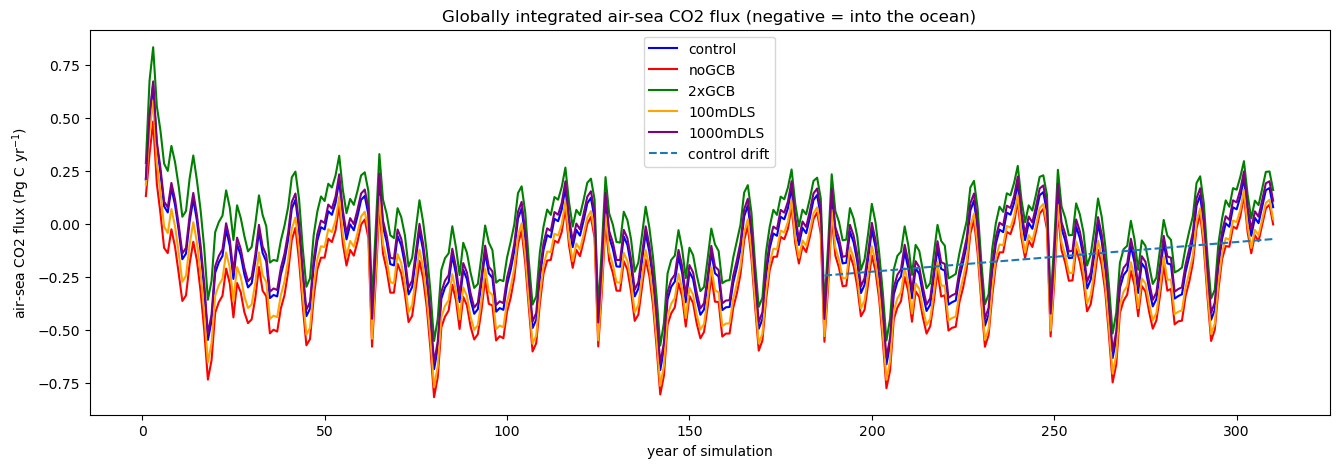

In [125]:
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Globally integrated air-sea CO2 flux (negative = into the ocean)')
ax.plot(years,ts_global['FG_CO2'],color='blue', label='control')
ax.plot(years,ts_global['FG_ALT_CO2_noGCB'],color='red', label='noGCB')
ax.plot(years,ts_global['FG_ALT_CO2_2xGCB'],color='green', label='2xGCB')
ax.plot(years,ts_global['FG_ALT_CO2_100mDLS'],color='orange', label='100mDLS')
ax.plot(years,ts_global['FG_ALT_CO2_1000mDLS'],color='purple', label='1000mDLS')

ax.plot(years.isel(time=slice(186,310)),drift_fg_co2,'--', label='control drift')

ax.set(ylabel='air-sea CO2 flux (Pg C yr$^{-1}$)',xlabel='year of simulation')
ax.legend()

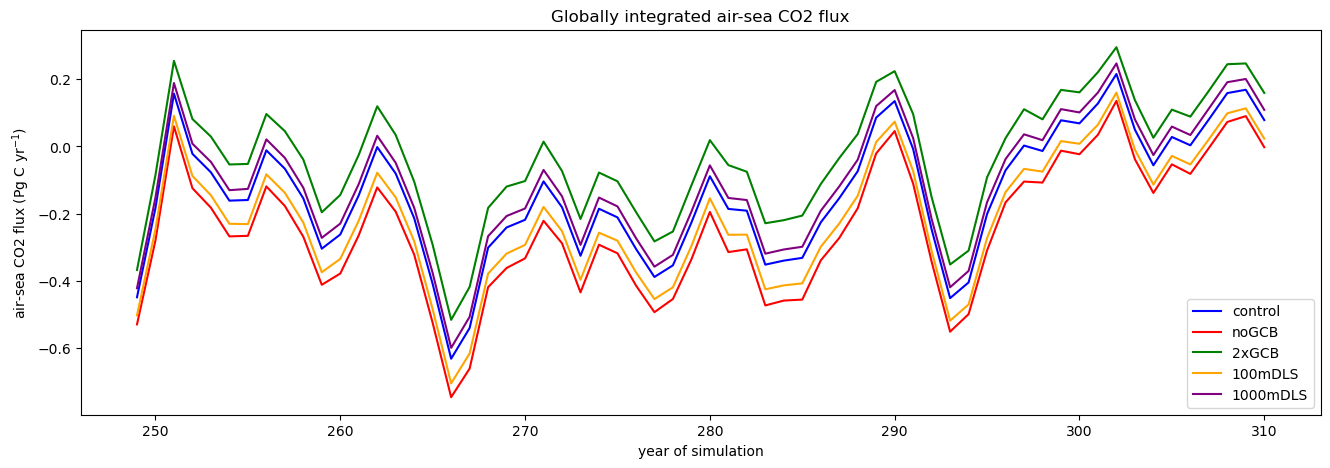

In [126]:
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Globally integrated air-sea CO2 flux')
ax.plot(years.isel(time=slice(248,310)),ts_global['FG_CO2'].isel(time=slice(248,310)),color='blue', label='control')
ax.plot(years.isel(time=slice(248,310)),ts_global['FG_ALT_CO2_noGCB'].isel(time=slice(248,310)),color='red', label='noGCB')
ax.plot(years.isel(time=slice(248,310)),ts_global['FG_ALT_CO2_2xGCB'].isel(time=slice(248,310)),color='green', label='2xGCB')
ax.plot(years.isel(time=slice(248,310)),ts_global['FG_ALT_CO2_100mDLS'].isel(time=slice(248,310)),color='orange', label='100mDLS')
ax.plot(years.isel(time=slice(248,310)),ts_global['FG_ALT_CO2_1000mDLS'].isel(time=slice(248,310)),color='purple', label='1000mDLS')
ax.set(ylabel='air-sea CO2 flux (Pg C yr$^{-1}$)',xlabel='year of simulation')
ax.legend()

### Mean global air-sea CO2 flux over 5th IAF cycle

In [127]:
mean_CO2_flux_control = ts_global['FG_CO2'].isel(time=slice(248,310)).mean(dim='time')
mean_CO2_flux_noGCB = ts_global['FG_ALT_CO2_noGCB'].isel(time=slice(248,310)).mean(dim='time')
mean_CO2_flux_2xGCB = ts_global['FG_ALT_CO2_2xGCB'].isel(time=slice(248,310)).mean(dim='time')
mean_CO2_flux_100mDLS = ts_global['FG_ALT_CO2_100mDLS'].isel(time=slice(248,310)).mean(dim='time')
mean_CO2_flux_1000mDLS = ts_global['FG_ALT_CO2_1000mDLS'].isel(time=slice(248,310)).mean(dim='time')

In [128]:
mean_CO2_flux_control.values

array(-0.14282391)

In [129]:
mean_CO2_flux_noGCB.values

array(-0.24693996)

In [130]:
mean_CO2_flux_2xGCB.values

array(-0.03800877)

In [131]:
mean_CO2_flux_100mDLS.values

array(-0.21071536)

In [132]:
mean_CO2_flux_1000mDLS.values

array(-0.1104773)

#### percent changes

In [133]:
## % change for noGCB run
(mean_CO2_flux_noGCB - mean_CO2_flux_control)/mean_CO2_flux_control * 100.

<xarray.DataArray ()>
array(72.89819048)

In [134]:
## % change for 2xGCB run
(mean_CO2_flux_2xGCB - mean_CO2_flux_control)/mean_CO2_flux_control * 100.

<xarray.DataArray ()>
array(-73.3876692)